<a href="https://colab.research.google.com/github/FelipeFerAl/ImageProcessing/blob/main/Conceptos/Convoluci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()
x_train.min(),x_train.max(),x_test.min(),x_test.max()

(0.0, 1.0, 0.0, 1.0)

In [4]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [5]:
meta = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

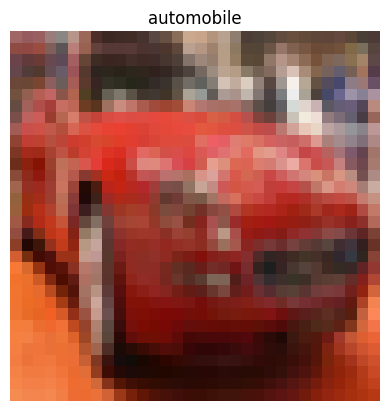

In [6]:
idx = 5
plt.imshow(x_train[idx]), plt.title(meta[y_train[idx]]), plt.axis('off')
plt.show()

In [7]:
model = Sequential()
model.add(Conv2D(32, (5,5), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(64, (5,5), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.fit(x_train, y_train, epochs=10, validation_split=0.3)

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9728 - loss: 0.0806 - val_accuracy: 0.9430 - val_loss: 0.1638
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9795 - loss: 0.0628 - val_accuracy: 0.9578 - val_loss: 0.1273
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9816 - loss: 0.0559 - val_accuracy: 0.9365 - val_loss: 0.1985
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9779 - loss: 0.0672 - val_accuracy: 0.9349 - val_loss: 0.2173
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9807 - loss: 0.0608 - val_accuracy: 0.9311 - val_loss: 0.2316
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9875 - loss: 0.0418 - val_accuracy: 0.9095 - val_loss: 0.3285
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9846 - loss: 0.0451 - val_accuracy: 0.8915 - val_loss: 0.4231
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9852 - loss: 0.

In [27]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

accuracy = 0
for i in range(len(y_test)):
    if y_pred[i] == y_test[i]:
        accuracy += 1
accuracy = accuracy/len(y_test)
print(f"Accuracy: {round(accuracy*100,3)}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 58.52%
